In [1]:
import torch
from torch import nn, optim, sigmoid
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as torch_data

In [2]:
train_data = torch_data.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_data = torch_data.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [3]:
import matplotlib.pyplot as plt
import numpy as np

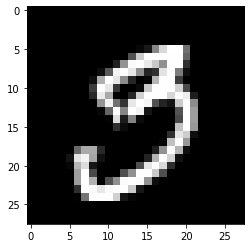

This is a 3


In [4]:
r_ix = np.random.randint(0, len(train_data) - 1)

plt.imshow(train_data[r_ix][0][0], cmap="gray")
plt.show()
print(f"This is a {train_data[r_ix][1]}")

In [5]:
class MultiClassNeuralNet(nn.Module):
    def __init__(self, IN, H, OUT):
        super(MultiClassNeuralNet, self).__init__()
        self.hidden = nn.Linear(IN, H)
        self.output = nn.Linear(H, OUT)

    def forward(self, x):
        z1 = self.hidden(x)
        a1 = sigmoid(z1)
        y_hat = self.output(a1)
        return y_hat

In [6]:
input_dim = 28 * 28
hidden_units = 64
output_dim = 10

model = MultiClassNeuralNet(input_dim, hidden_units, output_dim)

In [7]:
print(f"Input size = {input_dim}")
print("W_h:", list(model.parameters())[0].size())
print("b_h:", list(model.parameters())[1].size())
print("W_out:", list(model.parameters())[2].size())
print("b_out:", list(model.parameters())[3].size())
print(f"Output size = {output_dim}")

Input size = 784
W_h: torch.Size([64, 784])
b_h: torch.Size([64])
W_out: torch.Size([10, 64])
b_out: torch.Size([10])
Output size = 10


In [8]:
print(model)

MultiClassNeuralNet(
  (hidden): Linear(in_features=784, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


C:\Development\Anaconda3\lib\site-packages\torch\_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


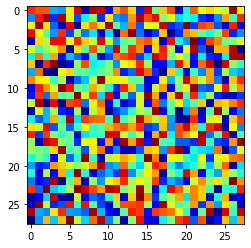

In [9]:
W1 = list(model.parameters())[0][0].resize(28, 28)
plt.imshow(W1.detach().numpy(), cmap="jet")
plt.show()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
train_loader = DataLoader(dataset=train_data, batch_size=128)
validation_loader = DataLoader(dataset=validation_data, batch_size=5000)

In [12]:
# train the model
n_epochs = 10
accuracy_list = []
loss_list = []

for epoch in range(n_epochs):
    # train on training set
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x.view(-1, 28 * 28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
    loss_list.append(loss.item())
    print(f"Train epoch {epoch} done:\n\tloss = {loss.item()}")

    # evaluate
    correct = 0
    for x_test, y_test in validation_loader:
        z = model(x_test.view(-1, 28 * 28))
        _, y_hat = torch.max(z.data, 1)
        correct = correct + (y_hat == y_test).sum().item()
    accuracy = correct / len(validation_data)
    print(f"Evaluation done:\n\tval_accuracy = {accuracy}\n#####################")
    accuracy_list.append(accuracy)

Train epoch 0 done:
	loss = 0.2401672750711441
Evaluation done:
	val_accuracy = 0.9446
#####################
Train epoch 1 done:
	loss = 0.1918775588274002
Evaluation done:
	val_accuracy = 0.9538
#####################
Train epoch 2 done:
	loss = 0.14790166914463043
Evaluation done:
	val_accuracy = 0.9582
#####################
Train epoch 3 done:
	loss = 0.10996458679437637
Evaluation done:
	val_accuracy = 0.9613
#####################
Train epoch 4 done:
	loss = 0.11310487240552902
Evaluation done:
	val_accuracy = 0.9601
#####################
Train epoch 5 done:
	loss = 0.1115766167640686
Evaluation done:
	val_accuracy = 0.9608
#####################
Train epoch 6 done:
	loss = 0.09778156131505966
Evaluation done:
	val_accuracy = 0.9606
#####################
Train epoch 7 done:
	loss = 0.08802446722984314
Evaluation done:
	val_accuracy = 0.9641
#####################
Train epoch 8 done:
	loss = 0.09193768352270126
Evaluation done:
	val_accuracy = 0.9643
#####################
Train epoch 9

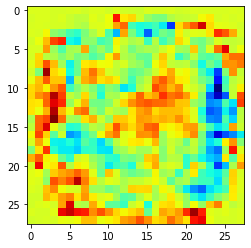

In [13]:
# lets see what the weights look like now
W1 = list(model.parameters())[0][0].resize(28, 28)
plt.imshow(W1.detach().numpy(), cmap="jet")
plt.show()